Dummy Encoding Warengruppe

In [4]:
from os import read
import pandas as pd
import numpy as np
from scipy import stats


# Read the CSV file

df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/_data_prepared/df_dataset_complete.csv')  # Use this if it's a comma-separated file
print(df.head())

        Datum      Umsatz  Brot  Broetchen  Croissant  Konditorei  Kuchen  \
0  2013-07-01  148.828353     1          0          0           0       0   
1  2013-07-01  148.828353     1          0          0           0       0   
2  2013-07-01  148.828353     1          0          0           0       0   
3  2013-07-01  148.828353     1          0          0           0       0   
4  2013-07-01  148.828353     1          0          0           0       0   

   Saisonbrot  national_holiday  christmas_market  ...  \
0           0                 0                 0  ...   
1           0                 0                 0  ...   
2           0                 0                 0  ...   
3           0                 0                 0  ...   
4           0                 0                 0  ...   

   Wettercode_2_leichter_niederschlag  Wettercode_3_starker_niederschlag  \
0                                 0.0                                0.0   
1                                 0.

In [ ]:
# Method 1: Using pandas get_dummies()
df_dummies = pd.get_dummies(df['Warengruppe'], prefix='Warengruppe')

# Method 2: If you want to add these to the existing DataFrame
df[['Warengruppe_' + str(i) for i in range(1, 7)]] = pd.get_dummies(df['Warengruppe'])

In [ ]:
# Create dummy columns manually
for i in range(1, 7):
    df[f'Warengruppe_{i}'] = (df['Warengruppe'] == i).astype(int)

In [ ]:
print(df[['Warengruppe'] + [f'Warengruppe_{i}' for i in range(1, 7)]].head())

   Warengruppe  Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  \
0            1              1              0              0              0   
1            1              1              0              0              0   
2            1              1              0              0              0   
3            1              1              0              0              0   
4            1              1              0              0              0   

   Warengruppe_5  Warengruppe_6  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  


In [ ]:
df.to_csv('Warengruppe.csv', index=False)

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/df_Warengruppe.csv')

# Create a dictionary for renaming
column_mapping = {
    'Warengruppe_1': 'Brot',
    'Warengruppe_2': 'Broetchen',
    'Warengruppe_3': 'Croissant',
    'Warengruppe_4': 'Konditorei',
    'Warengruppe_5': 'Kuchen',
    'Warengruppe_6': 'Saisonbrot'
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)

# Save the renamed DataFrame back to CSV
df.to_csv('/workspaces/MA-bakery-sales-prediction/df_Warengruppe_renamed.csv', index=False)

# Print the new column names to verify
print(df.columns)

Index(['Datum', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Bewoelkung',
       'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 'Wochentag_Mo',
       'Wochentag_Di', 'Wochentag_Mi', 'Wochentag_Do', 'Wochentag_Fr',
       'Wochentag_Sa', 'Wochentag_So', 'national_holiday', 'christmas_market',
       'maritime_conference', 'nordic_film_days', 'Brot', 'Broetchen',
       'Croissant', 'Konditorei', 'Kuchen', 'Saisonbrot'],
      dtype='object')


In [ ]:
# Save the renamed DataFrame to the original file path
df.to_csv('/workspaces/MA-bakery-sales-prediction/df_Warengruppe.csv', index=False)

Outlier Umsatz

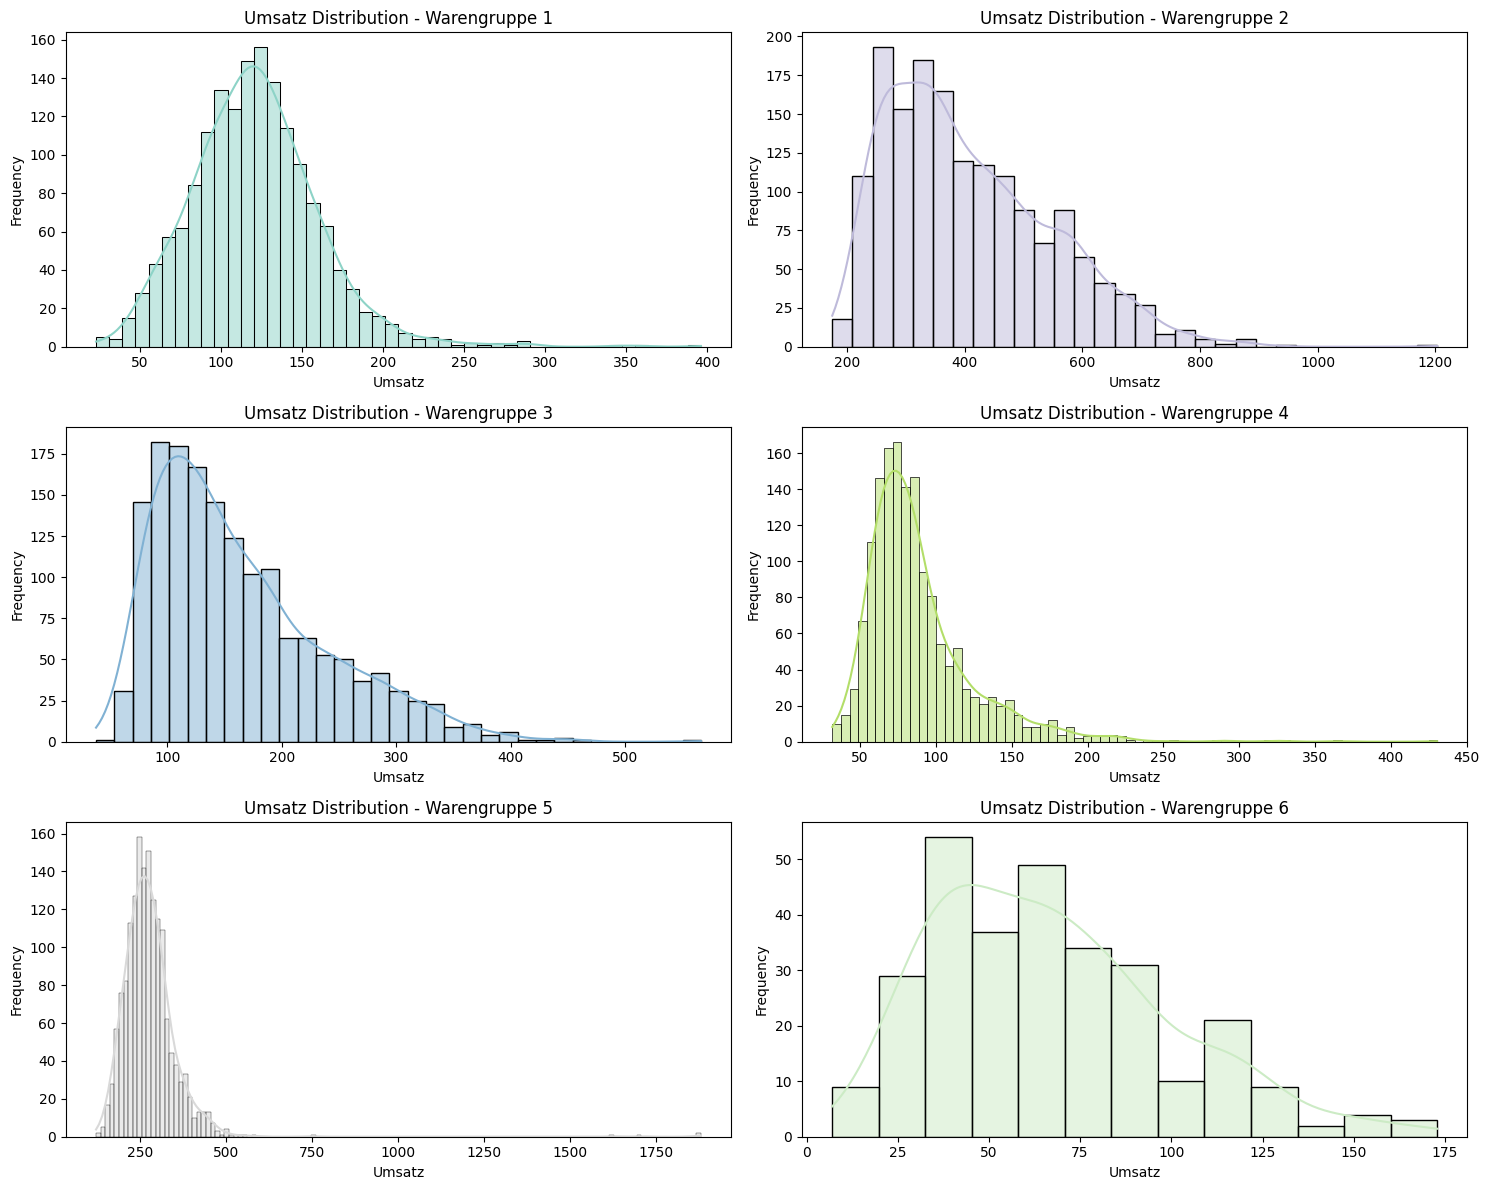

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('/workspaces/MA-bakery-sales-prediction/0_DataPreparation/df_data_for_first_linear_regression.csv')

def plot_umsatz_analysis(df, additional_x_columns=None):
    """
    Create comprehensive plots for Umsatz analysis
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    additional_x_columns (list): Optional list of columns to create scatterplots against Umsatz
    """
    # Determine unique Warengruppen
    warengruppen = df['Warengruppe'].unique()
    
    # Histograms
    plt.figure(figsize=(15, 4 * ((len(warengruppen) + 1) // 2)))
    
    # Histograms subplot
    for i, group in enumerate(warengruppen):
        plt.subplot((len(warengruppen) + 1) // 2, 2, i+1)
        group_data = df[df['Warengruppe'] == group]['Umsatz']
        sns.histplot(group_data, kde=True, color=plt.cm.Set3(i/len(warengruppen)))
        plt.title(f'Umsatz Distribution - Warengruppe {group}')
        plt.xlabel('Umsatz')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    


# Execute the function
plot_umsatz_analysis(df)